# Transfer Learning

## Import Packages

In [1]:
!pip uninstall ml_project_util -y
!pip install git+https://github.com/aris-gk3/ml_project_util.git

import tensorflow as tf
import os
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
# Local Packages
from ml_project_util.path import path_definition
from ml_project_util.train import train, freeze_layers, unfreeze_head, unfreeze_block
from ml_project_util.quantization_util import quant_model, quant_bw_search
from ml_project_util.model_evaluation import model_evaluation_precise

  Cloning https://github.com/aris-gk3/ml_project_util.git to /tmp/pip-req-build-lgdsdvto
  Running command git clone --filter=blob:none --quiet https://github.com/aris-gk3/ml_project_util.git /tmp/pip-req-build-lgdsdvto
  Resolved https://github.com/aris-gk3/ml_project_util.git to commit 1921b62d0d3eb376f616747288cd373b403506c7
  Preparing metadata (setup.py) ... done
  Created wheel for ml_project_util: filename=ml_project_util-0.1-py3-none-any.whl size=22366 sha256=1730c66701e8e044f78944141a92b382f71d915a731e9845a5446a692df7ad39
  Stored in directory: /tmp/pip-ephem-wheel-cache-hy0x5nx7/wheels/9b/33/7a/e8e8f55a4c6aa39df26369c48b9e3497c6dde4c7663912f8ef
Successfully built ml_project_util


2025-06-14 07:49:41.623852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749887381.817267      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749887381.873904      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Define Variable Paths

In [2]:
dict = path_definition(ds_rel_path='oxford-flowers-17-restructured') # path_definition.config to read
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

ds_rel_path set to: oxford-flowers-17-restructured


## Define the Model

In [3]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))       
model.add(layers.Dense(17, activation='softmax'))

I0000 00:00:1749887398.048425      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Train the Model

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d (GlobalAveragePooling2D), Trainable: False
- dense (Dense), Trainable: False
- dropout (Dropout), Trainable: False
- dense_1 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainable: Fal

I0000 00:00:1749887405.498503     100 service.cc:148] XLA service 0x79571000cc50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749887405.499654     100 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749887405.907219     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/26 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.0781 - loss: 9.4788  

I0000 00:00:1749887414.437334     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.1187 - loss: 6.5412
Epoch 1: saving model to /kaggle/working/SavedModels/OF2/OF2_P1_001_val1.2226.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 813ms/step - accuracy: 0.1218 - loss: 6.4703 - val_accuracy: 0.6520 - val_loss: 1.2226
Epoch 2/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.4962 - loss: 1.6579
Epoch 2: saving model to /kaggle/working/SavedModels/OF2/OF2_P1_002_val0.8024.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 523ms/step - accuracy: 0.4974 - loss: 1.6536 - val_accuracy: 0.7402 - val_loss: 0.8024
Epoch 3/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.6333 - loss: 1.0974
Epoch 3: saving model to /kaggle/working/SavedModels/OF2/OF2_P1_003_val0.6281.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 530ms/step - accuracy: 0.6341 - loss: 1.0962 - val_accuracy: 0.8039 - val_loss: 0.6281
Epoch 4/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.6996 - loss: 0.9704
Epoch 4: saving model to /kaggle/working/SavedModels/OF2/OF2_

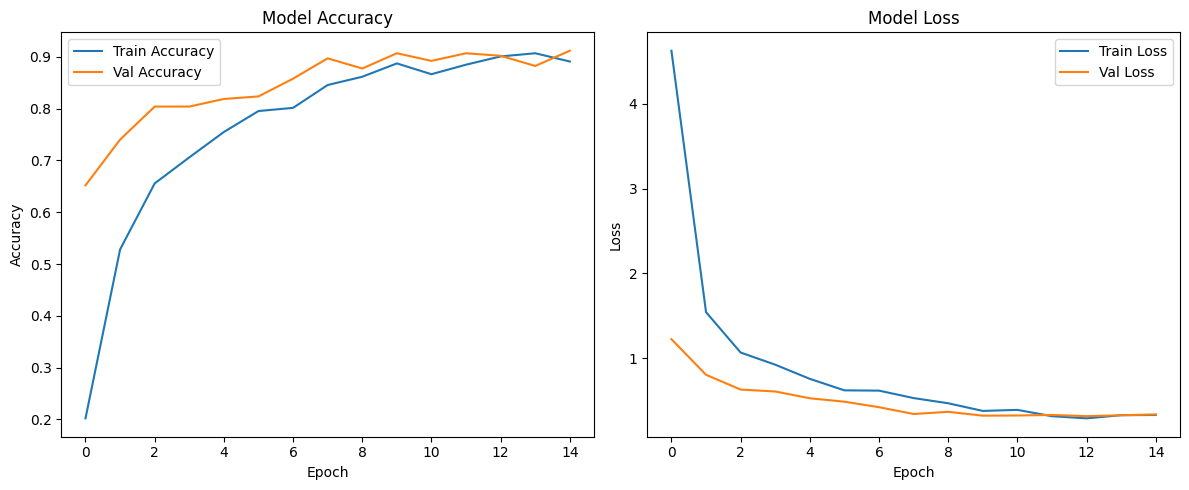

In [4]:
epochs = 15
lr = 1e-3
optimizer = 'Adam'
name = 'OF2_P1'
freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=0, plot=True)

In [5]:
model_evaluation_precise(model)

Found 340 files belonging to 17 classes.
Start evaluating batches
Batch Number: 10
Precise test accuracy: 0.88824
Precise test loss: 0.43011


(0.8882353, 0.4301148523302639)

In [6]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))       
model.add(layers.Dense(17, activation='softmax'))

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_1 (GlobalAveragePooling2D), Trainable: False
- dense_2 (Dense), Trainable: False
- dropout_1 (Dropout), Trainable: False
- dense_3 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

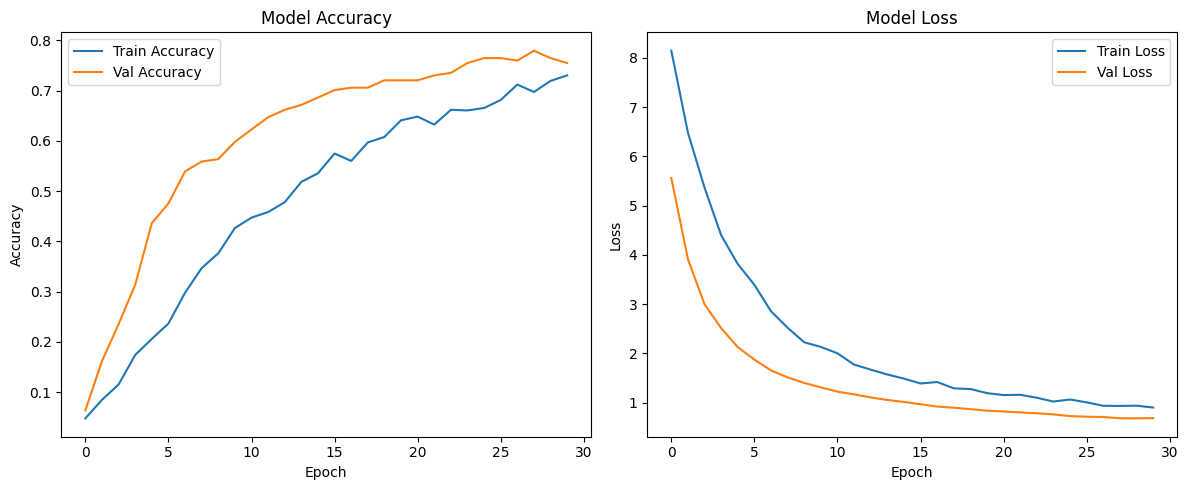

In [7]:
epochs = 30
lr = 1e-4
optimizer = 'Adam'
name = 'OF2_P2'
freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=0, plot=True)

In [8]:
model_evaluation_precise(model)

Found 340 files belonging to 17 classes.
Start evaluating batches
Batch Number: 10
Precise test accuracy: 0.76471
Precise test loss: 0.66469


(0.7647059, 0.6646896123886108)

In [9]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))       
model.add(layers.Dense(17, activation='softmax'))

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_2 (GlobalAveragePooling2D), Trainable: False
- dense_4 (Dense), Trainable: False
- dropout_2 (Dropout), Trainable: False
- dense_5 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

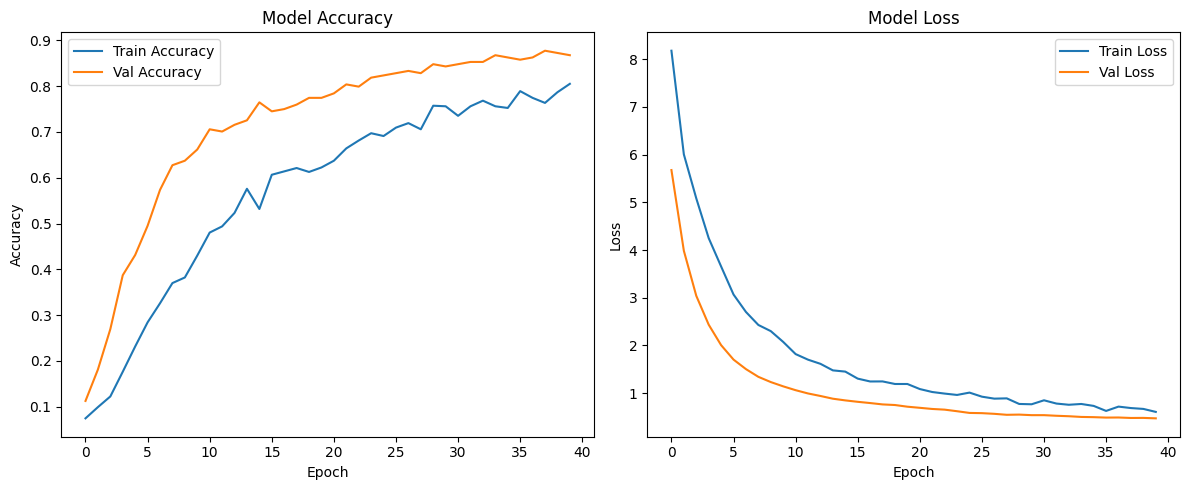

In [10]:
epochs = 40
# lr = 1e-5
optimizer = 'Adam'
name = 'OF2_P2'
freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=0, plot=True)

In [11]:
model_evaluation_precise(model)

Found 340 files belonging to 17 classes.
Start evaluating batches
Batch Number: 10
Precise test accuracy: 0.83824
Precise test loss: 0.53327


(0.8382353, 0.5332656937486985)

## PTQ & Evaluate

In [12]:
# model_name = 'of1_p1_003_val0.4768'
# # model_path = f"{PATH_SAVEDMODELS}/{model_name[:3]}/{model_name}.keras"
# model_path = '/kaggle/input/of1_p1_003_val0.4768/keras/default/1/OF1_P1_003_val0.4768.keras'
# model = tf.keras.models.load_model(model_path)

In [13]:
# %%time
# quant_bw_search(model, model_name, range(9,20))

In [14]:
# model_evaluation_precise(model)